# Example 1: Titanic survivors


In [5]:
# Load the basic libraries...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" width="100%">

### Data

* http://lib.stat.cmu.edu/S/Harrell/data/descriptions/titanic.html
* https://www.kaggle.com/c/titanic/data

<PRE>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</PRE>

In [6]:
titanic_df = pd.read_csv("/home/jan/su-jupyter/data/titanic-train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
titanic_df.drop(['PassengerId'], axis=1, inplace=True)

In [4]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df1 = titanic_df[['Pclass', 'Sex', 'Age','Survived']]
titanic_df1

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0
5,3,male,NaN,0
6,1,male,54,0
7,3,male,2,0
8,3,female,27,1
9,2,female,14,1


In [9]:
survivors = titanic_df1[titanic_df1['Survived']==1]
victims = titanic_df1[titanic_df1['Survived']==0]

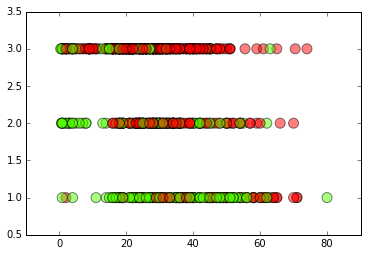

In [11]:
scatter(titanic_df1['Age'], titanic_df1['Pclass'], 
        c=titanic_df1['Survived'], cmap='prism', marker='o', s=100, alpha=0.5);

### Training a classifier

In [12]:
titanic_X = titanic_df[['Pclass', 'Sex', 'Age']].as_matrix()
titanic_y = titanic_df['Survived'].as_matrix()

In [13]:
shape(titanic_X), shape(titanic_y)

((891, 3), (891,))

In [14]:
titanic_X

array([[3, 'male', 22.0],
       [1, 'female', 38.0],
       [3, 'female', 26.0],
       ..., 
       [3, 'female', nan],
       [1, 'male', 26.0],
       [3, 'male', 32.0]], dtype=object)

In [15]:
titanic_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
titanic_X[:,1] = le.fit_transform(titanic_X[:,1])
print titanic_X

[[3 1 22.0]
 [1 0 38.0]
 [3 0 26.0]
 ..., 
 [3 0 nan]
 [1 1 26.0]
 [3 1 32.0]]


In [18]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
titanic_X = imp.fit_transform(titanic_X)
print titanic_X

[[  3.           1.          22.        ]
 [  1.           0.          38.        ]
 [  3.           0.          26.        ]
 ..., 
 [  3.           0.          29.69911765]
 [  1.           1.          26.        ]
 [  3.           1.          32.        ]]


In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(titanic_X, titanic_y)

In [21]:
titanic_y_predicted = clf.predict(titanic_X)

In [22]:
titanic_df.insert(1,'Survior pred', titanic_y_predicted)
titanic_df

,PassengerId,Survior pred,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(titanic_y, titanic_y_predicted)

0.80920314253647585

In [20]:
from sklearn.externals.six import StringIO  
import pyparsing
import pydot
from IPython.display import Image
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=['Pclass', 'Sex', 'Age'])
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
img = Image(graph.create_png())

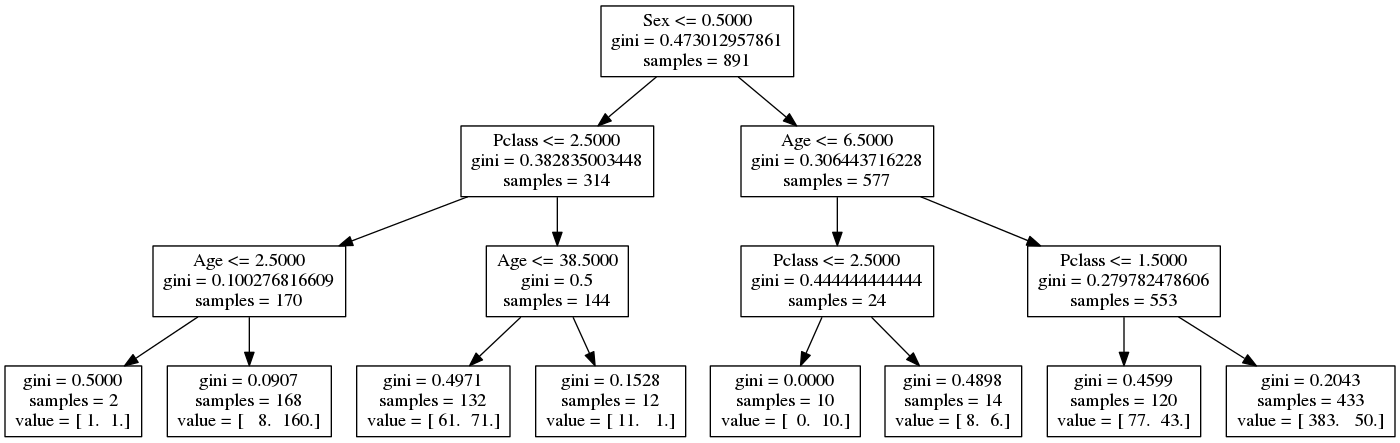

In [50]:
img.width=800; img

In [51]:
titanic_y_predicted_proba = clf.predict_proba(titanic_X)

In [52]:
titanic_df.insert(2,'Survior prob', titanic_y_predicted_proba[:,1])
titanic_df

,Survived,Survior pred,Survior prob,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0.115473,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0.952381,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,1,0.537879,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0.952381,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,0,0.115473,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,0,0.115473,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,0,0.358333,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,0,0.428571,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,1,0.537879,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,1,0.952381,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [35]:
# Pclass, Sex, Age
x_male_student = sp.array([3, 1, 21])
x_rich_countess = sp.array([1, 0, 65])
x_midleclass_mother = sp.array([2, 0, 40])
x_baby = sp.array([1, 0, 1])

In [32]:
clf.predict_proba(x_male_student)

array([[ 0.88452656,  0.11547344]])

In [33]:
clf.predict_proba(x_rich_countess)

array([[ 0.04761905,  0.95238095]])

In [36]:
clf.predict_proba(x_midleclass_mother)

array([[ 0.04761905,  0.95238095]])

In [37]:
clf.predict_proba(x_baby)

array([[ 0.5,  0.5]])